In [26]:
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA

# PCA (Principal Component Analysis)

- 주성분 분석이라고도 하며 고차원의 데이터를 분산이 가장 큰 저차원의 데이터로 환원 시키는 기법

## < 목적 >
- 시각화(4차원이상의 데이터를 3차원으로 축소)를 통한 데이터 이해도 향상
- 차원의 저주(dimention of recursion)를 예방
- 작업량 및 메모리 손실 방지

## < 정성적인 개념 >
(사실 4차원 이상은 상황 묘사에 어려움이 있음으로 2차원만 사용)

##### 2차원   -->   1차원

In [84]:
# iris데이터에서 꽃입의 "길이" 와 "폭" 만을 가져와 비교
iris = load_iris()
X = iris.data[:40,:2]
length = iris.data[:40,:1]
width = iris.data[:40,1:2]

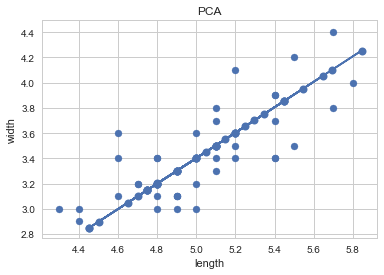

In [19]:
# 2차원의 iris data
plt.scatter(length, width)
plt.plot(X2[:, 0], X2[:, 1], "o-", markersize=8)
plt.xlabel("length")
plt.ylabel("width")
plt.title("PCA")
plt.show()

In [23]:
# pca를 통한 차원 축소
pca1 = PCA(n_components=1)
X_low = pca1.fit_transform(X)


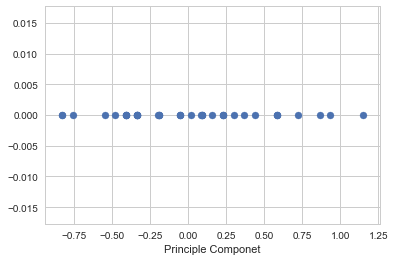

In [22]:
# 1차원의 iris data
plt.scatter(X_low, [0]*40)
plt.xlabel("Principle Componet")
plt.show()

In [24]:
# 선을 긋기 위해 X_low차원을 X차원으로 
X2 = pca1.inverse_transform(X_low) 

## <정량적인 개념>

### 1.

$X \in R ^ {N \times D}$
#### $M<D$ 일때  W(변환행렬)에  의해  D차원에서  M차원으로 축소
    - 최적의 W를 구하기 (최적의 W는 차원을 줄이면서 정보량은 최대한 보존하는 변환 행렬)
- $ \hat{x}_i = Wx_i $ $(\hat{x}_i\in R^{M\times1},   \ W \in R^{M\times D},   x_i\in R^{D\times1})$
- 이때 $\hat{x}$ 와 $x$는 아주 비슷한 정보여야 함 = 그래야 최적의 $W$
- but 차원이 달라서 이 둘이 비슷한지 판단이 불가 =>  $\hat{x}$의 차원을 다시 늘려서 $x$와 같게 만듦
-  $ \hat{\hat{x_i}} = U\hat{x_i} $ $(\hat{\hat{x}}_i\in R^{D\times1},   \ U \in R^{D\times M},  \hat{x_i}\in R^{M\times1})$
- 따라서 $\hat{\hat{x_i}} =  U\hat{x_i} = UWx_i$ 이니깐 UW가 I일때 최적의 W

- $argmin ||x-\hat{\hat{x}}||^2$ = $argmin ||x-U\hat{x}||^2$ 를 구해야함
- $(x-U\hat{x})^T(x-U\hat{x}) = x^Tx - \hat{x}^TU^Tx - x^TU\hat{x} + \hat{x}^TU^TU\hat{x} = x^Tx - 2x^TU\hat{x} + \hat{x}^T\hat{x}$
- 위식을 미분했을때 0 이 나오도록 해야함 ($\hat{x}$으로 미분)
- 결과 : $\hat{x} = U^Tx$
- 원래식($\hat{x} = Wx$)과 비교했을때 $U^T = W$ 일때 W가 최적의 W라는 결론이 나옴

### 2.
- d 차원 데이터에 d개의 고유벡터가 생기고 고유벡터에 데이터를 정사영하면 분산이 최대가 됨
- 왜 최대가 되나 (단, 각 feature의 평균이 0 으로 통일되야함) :
    - 정사영의 대상인 임의의 단위벡터 $e \in d\times1$ (이 $e$가 고유벡터?)
    - $Xe \in R^{n\times1}$ = $X$를 $e$에 정사영
    - $e$에 정사영된 데이터의 분산
        - $Var(Xe) = \dfrac{1}n \sum^n_{i=1}(Xe-E(Xe))^2 = \dfrac{1}n \sum^n_{i=1}(Xe)^2$ 
        - $= \dfrac{1}n(Xe)^T(Xe) = \dfrac{1}ne^T(X^TX)e = e^T(\dfrac{X^TX}{n})e = e^T\sum e$
    - 여기서 분산을 가장 크게하는 e(단위벡터)를 찾아야 함으로 목적함수가 $e^T\sum e$ 면서 $||e||^2 = 1$이라는 제약조건이 있으니깐 라그랑주 승수법을 이용
    - $L = e^T\sum e - \lambda (||e||^2-1)$ 
    - $\dfrac{\partial L}{\partial e} = 2\sum e - 2 \lambda e = 0$
    - #### 결론1 : $\sum e = \lambda e$의 조건을 만족하는 $e$ (=고유벡터)가 분산을 최대로 함
    - #### 결론2 : $Var(Xe) = e^T\sum e = e^T\lambda e = \lambda e^Te = \lambda$
        임으로 고유벡터를 통해 정사영했을때 분산은 고유값임을 알수있다

## <이미지 PCA>

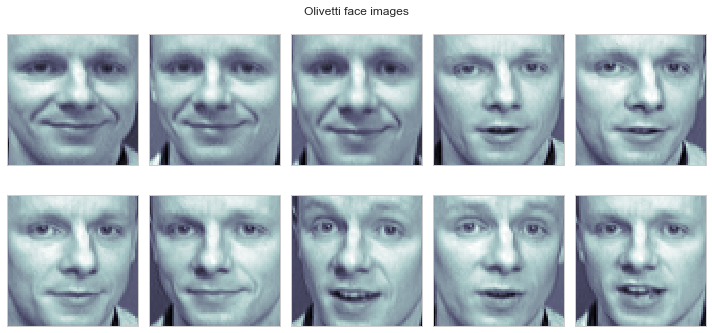

In [64]:
faces_all = fetch_olivetti_faces()
K = 20
faces = faces_all.images[faces_all.target == K]

N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust()
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1) # plot을 위치시킴
        ax.imshow(faces[k], cmap=plt.cm.bone) # image를 나타냄
        ax.grid(False) # grid 삭제
        ax.xaxis.set_ticks([]) # plot의 숫자 값을 삭제
        ax.yaxis.set_ticks([])
       
plt.tight_layout() # 위열과 아래열의 간격을 좁힘
plt.suptitle("Olivetti face images")
plt.show()

In [82]:
# 주성분이 2개인 PCA분석
pca3 = PCA(n_components=2)
X3 = faces_all.data[faces_all.target == K]
W3 = pca3.fit_transform(X3)
X32 = pca3.inverse_transform(W3)

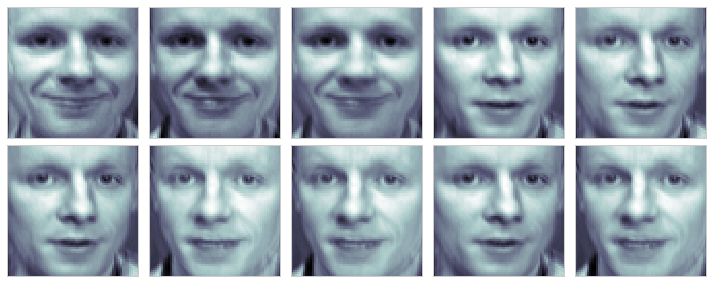

In [83]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(X32[k].reshape(64, 64), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.tight_layout()
plt.show()

### 관련 개념
- 분산
- 공분산 행렬
- 정사영
- 선형 변환
- 라그랑주 승수법
- 고유값, 고유벡터
- 차원의 저주

# Refernece
- https://ko.wikipedia.org/wiki/%EC%A3%BC%EC%84%B1%EB%B6%84_%EB%B6%84%EC%84%9D#%ED%8A%B9%EC%84%B1
- https://datascienceschool.net/view-notebook/f10aad8a34a4489697933f77c5d58e3a/
- http://salamander724.wikidot.com/rudimentary-mathematical-methods-of-physics-03#toc18
- https://www.youtube.com/watch?v=jNwf-JUGWgg
- https://wikidocs.net/7646